This file merges the price and institional data into one df

In [54]:
import pandas as pd
import numpy as np

In [55]:
price_data_file = '../data/price_data_cleaned.pkl'
instit_data_file = '../data/institutional_data_agg_all.pkl'

# Read in pkl files
price_data = pd.read_pickle(price_data_file)
instit_data = pd.read_pickle(instit_data_file)

In [56]:
display(price_data)

,PERMNO,date,EXCHCD,SICCD,TICKER,TRDSTAT,CUSIP,DLSTCD,DLRET,PRC,RET,SHROUT
3170,10002,2005/01/03,3.0,6020,BTFG,A,05978R10,NaN,NaN,23.830,-0.031694,11021000.0
3171,10002,2005/01/04,3.0,6020,BTFG,A,05978R10,NaN,NaN,23.450,-0.015946,11021000.0
3172,10002,2005/01/05,3.0,6020,BTFG,A,05978R10,NaN,NaN,22.400,-0.044776,11021000.0
3173,10002,2005/01/06,3.0,6020,BTFG,A,05978R10,NaN,NaN,21.350,-0.046875,11021000.0
3174,10002,2005/01/07,3.0,6020,BTFG,A,05978R10,NaN,NaN,20.900,-0.021077,11021000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33086114,93435,2012/05/14,3.0,6163.0,SCEI,A,82936G20,NaN,NaN,1.529,-0.061963,23864000.0
33086115,93435,2012/05/15,3.0,6163.0,SCEI,A,82936G20,NaN,NaN,1.310,-0.143231,23864000.0
33086116,93435,2012/05/16,3.0,6163.0,SCEI,A,82936G20,NaN,NaN,1.340,0.022901,23864000.0
33086117,93435,2012/05/17,3.0,6163.0,SCEI,A,82936G20,NaN,NaN,0.949,-0.291791,23864000.0


In [57]:
display(instit_data)

,cusip,fdate,shares
0,00030310,2015-09-30,181
1,00030310,2015-10-01,181
2,00030310,2015-10-02,181
3,00030310,2015-10-03,181
4,00030310,2015-10-04,181
...,...,...,...
69713079,Z1961929,2016-09-26,3590
69713080,Z1961929,2016-09-27,3590
69713081,Z1961929,2016-09-28,3590
69713082,Z1961929,2016-09-29,3590


In [58]:
price_data['date'] = pd.to_datetime(price_data['date'], format='%Y/%m/%d')
price_data = price_data.sort_values(by=['CUSIP', 'date'])

In [59]:
# Merge with daily stock data
daily_stock_data_merged = price_data.merge(instit_data, how='left', left_on=['CUSIP', 'date'], right_on=['cusip', 'fdate'])

# drop na cusip_y
# daily_stock_data_merged = daily_stock_data_merged.dropna(subset=['cusip_y'])

# ownership percentage. shares / cshoc
#  daily_stock_data_merged['instituional_ownership_perc'] = daily_stock_data_merged['shares'] / daily_stock_data_merged['cshoc']

In [60]:
display(daily_stock_data_merged)

,PERMNO,date,EXCHCD,SICCD,TICKER,TRDSTAT,CUSIP,DLSTCD,DLRET,PRC,RET,SHROUT,cusip,fdate,shares
0,42067,2005-01-03,1.0,8711,XNR,A,36108610,NaN,NaN,2.84,0.014286,31617000.0,NaN,NaT,NaN
1,42067,2005-01-04,1.0,8711,XNR,A,36108610,NaN,NaN,2.82,-0.007042,31617000.0,NaN,NaT,NaN
2,42067,2005-01-05,1.0,8711,XNR,A,36108610,NaN,NaN,2.80,-0.007092,31617000.0,NaN,NaT,NaN
3,42067,2005-01-06,1.0,8711,XNR,A,36108610,NaN,NaN,2.85,0.017857,31617000.0,NaN,NaT,NaN
4,42067,2005-01-07,1.0,8711,XNR,A,36108610,NaN,NaN,2.80,-0.017544,31617000.0,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333112,15857,2022-12-23,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,6.51,0.015601,86901000.0,NaN,NaT,NaN
14333113,15857,2022-12-27,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,6.11,-0.061444,86901000.0,NaN,NaT,NaN
14333114,15857,2022-12-28,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,6.52,0.067103,86901000.0,NaN,NaT,NaN
14333115,15857,2022-12-29,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,7.00,0.073620,86901000.0,NaN,NaT,NaN


In [61]:
# Drop cusip with nans because they don't have institutional data
daily_stock_data_merged = daily_stock_data_merged.dropna(subset=['cusip'])

In [62]:
display(daily_stock_data_merged)

,PERMNO,date,EXCHCD,SICCD,TICKER,TRDSTAT,CUSIP,DLSTCD,DLRET,PRC,RET,SHROUT,cusip,fdate,shares
11861,14945,2014-12-31,1.0,6799,AAC,A,00030710,NaN,NaN,30.92,-0.001292,21081000.0,00030710,2014-12-31,2954597.0
11862,14945,2015-01-02,1.0,6799,AAC,A,00030710,NaN,NaN,30.21,-0.022963,21081000.0,00030710,2015-01-02,2954597.0
11863,14945,2015-01-05,1.0,6799,AAC,A,00030710,NaN,NaN,29.73,-0.015889,21081000.0,00030710,2015-01-05,2954597.0
11864,14945,2015-01-06,1.0,6799,AAC,A,00030710,NaN,NaN,29.38,-0.011773,21081000.0,00030710,2015-01-06,2954597.0
11865,14945,2015-01-07,1.0,6799,AAC,A,00030710,NaN,NaN,28.64,-0.025187,21081000.0,00030710,2015-01-07,2954597.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332861,15857,2021-12-27,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,3.50,-0.054054,51998000.0,Y9530810,2021-12-27,30737458.0
14332862,15857,2021-12-28,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,3.30,-0.057143,51998000.0,Y9530810,2021-12-28,30737458.0
14332863,15857,2021-12-29,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,3.25,-0.015152,51998000.0,Y9530810,2021-12-29,30737458.0
14332864,15857,2021-12-30,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,3.28,0.009231,51998000.0,Y9530810,2021-12-30,30737458.0


In [63]:
# institutional ownership percentage
daily_stock_data_merged['institutional_ownership_perc'] = daily_stock_data_merged['shares'] / daily_stock_data_merged['SHROUT']

In [64]:
display(daily_stock_data_merged)

,PERMNO,date,EXCHCD,SICCD,TICKER,TRDSTAT,CUSIP,DLSTCD,DLRET,PRC,RET,SHROUT,cusip,fdate,shares,institutional_ownership_perc
11861,14945,2014-12-31,1.0,6799,AAC,A,00030710,NaN,NaN,30.92,-0.001292,21081000.0,00030710,2014-12-31,2954597.0,0.140154
11862,14945,2015-01-02,1.0,6799,AAC,A,00030710,NaN,NaN,30.21,-0.022963,21081000.0,00030710,2015-01-02,2954597.0,0.140154
11863,14945,2015-01-05,1.0,6799,AAC,A,00030710,NaN,NaN,29.73,-0.015889,21081000.0,00030710,2015-01-05,2954597.0,0.140154
11864,14945,2015-01-06,1.0,6799,AAC,A,00030710,NaN,NaN,29.38,-0.011773,21081000.0,00030710,2015-01-06,2954597.0,0.140154
11865,14945,2015-01-07,1.0,6799,AAC,A,00030710,NaN,NaN,28.64,-0.025187,21081000.0,00030710,2015-01-07,2954597.0,0.140154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332861,15857,2021-12-27,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,3.50,-0.054054,51998000.0,Y9530810,2021-12-27,30737458.0,0.591128
14332862,15857,2021-12-28,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,3.30,-0.057143,51998000.0,Y9530810,2021-12-28,30737458.0,0.591128
14332863,15857,2021-12-29,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,3.25,-0.015152,51998000.0,Y9530810,2021-12-29,30737458.0,0.591128
14332864,15857,2021-12-30,3.0,9999.0,WVE,A,Y9530810,NaN,NaN,3.28,0.009231,51998000.0,Y9530810,2021-12-30,30737458.0,0.591128


Text(0.5, 1.0, 'Institutional Ownership Percentage Histogram')

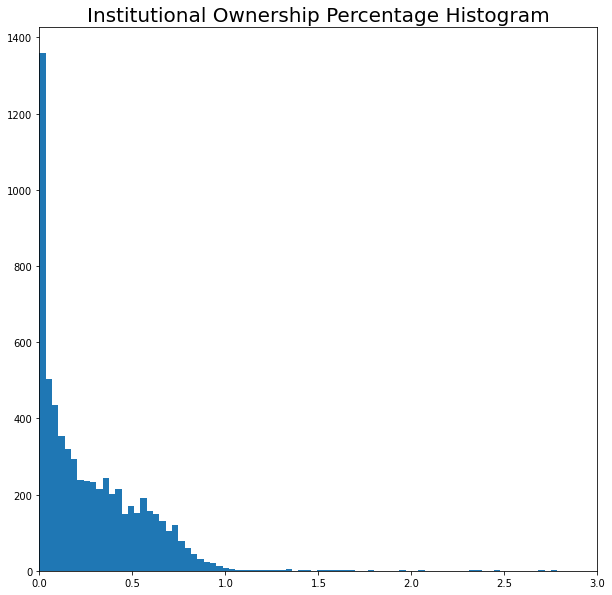

In [65]:
# Plot histogram of institutional ownership percentage
import matplotlib.pyplot as plt
# Group by permno and take first value of institutional ownership percentage
temp = daily_stock_data_merged.groupby('PERMNO').first().reset_index()
# Plot histogram
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(temp['institutional_ownership_perc'], bins=1000)
# set x lim
ax.set_xlim(0, 3)

# add title
ax.set_title('Institutional Ownership Percentage Histogram', fontsize=20)

In [66]:
# Save merged data
daily_stock_data_merged.to_pickle('../data/merged_price_instit_data.pkl')
daily_stock_data_merged.to_csv('../data/merged_price_instit_data.csv')